##CHW 02 - Ex1 - Parnian Taheri - 99106352##

In [ ]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

In [1]:
# Load .mat file
mat_data = scipy.io.loadmat('Ex1.mat')

NameError: name 'scipy' is not defined

##A##

In [7]:
NO = np.array(mat_data['NOemission'].flatten()).reshape(-1,1)
fuel = np.array(mat_data['fuelrate'].flatten()).reshape(-1,1)
speed = np.array(mat_data['speed'].flatten()).reshape(-1,1)

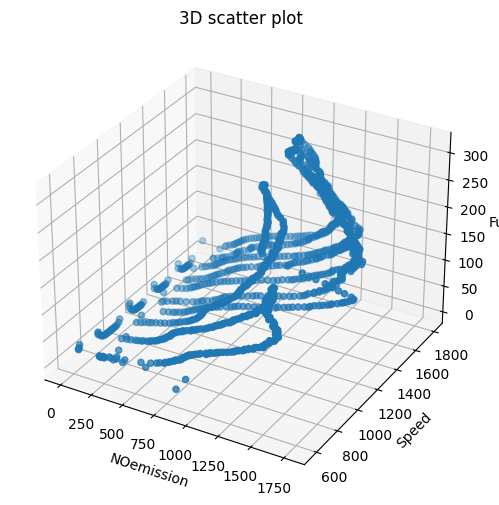

In [8]:
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")
scatter = ax.scatter3D(NO, speed, fuel)

plt.title("3D scatter plot")
ax.set_xlabel('NOemission')
ax.set_ylabel('Speed')
ax.set_zlabel('Fuel')


# show plot
plt.show()

##B##

In [9]:
# Split
X = np.concatenate((NO, speed), axis=1)
y = fuel
n = 1-700/fuel.size
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=n, shuffle=False)

##C##

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_validation_pred = model.predict(X_validation)

# Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_validation = mean_squared_error(y_validation, y_validation_pred)

print(f'Mean Squared Error on Training Set: {mse_train}')
print(f'Mean Squared Error on Validation Set: {mse_validation}')

Mean Squared Error on Training Set: 3464.676948030772
Mean Squared Error on Validation Set: 3669.401838435209


##D##

In [17]:
k = 10
model = LinearRegression()
y_train_log = np.log(((max(y_train) + k) - y_train)/y_train)

model.fit(X_train, y_train_log)


X_pred_train = model.predict(X_train)
y_pred_train_log=((max(y_train) + k) /(1 + np.exp(X_pred_train)))

X_pred_val = model.predict(X_validation)
y_pred_val_log=(max(y_train) + k) /(1 + np.exp(X_pred_val))

mse_train = mean_squared_error(y_train, y_pred_train_log)
mse_val = mean_squared_error(y_validation, y_pred_val_log)
print("Mean Squared Error on Train Set:", mse_train)
print("Mean Squared Error on Validation Set:", mse_val)

Mean Squared Error on Train Set: 3956.2471240061486
Mean Squared Error on Validation Set: 4284.593514522991


##E##

In [24]:
best_error_val = 100000
best_error_train = 100000
best_unit = 0;
for i in range(12,17):
  print("Number of units = ",i)
  # Define the model
  model = Sequential()
  model.add(Dense(units=15, input_dim = 2, activation='relu'))  # Hidden layer
  model.add(Dense(units=1))  # Output layer

  model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

  # Train
  model.fit(X_train, y_train, epochs=400)

  # predictions
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  y_pred_validation = model.predict(X_validation)
  mse_validation = mean_squared_error(y_validation, y_pred_validation)
  if mse_validation<best_error_val:
    best_error_val = mse_validation
    best_error_train = mse_train
    best_unit = i
  print("Mean Squared Error on Train Set:", mse_train)
  print("Mean Squared Error on Validation Set:", mse_validation)

Number of units =  12
Epoch 1/400
22/22 [==============================] - 1s 4ms/step - loss: 138025.1094 - accuracy: 0.0057
Epoch 2/400
22/22 [==============================] - 0s 3ms/step - loss: 60778.8164 - accuracy: 0.0057
Epoch 3/400
22/22 [==============================] - 0s 3ms/step - loss: 35229.8047 - accuracy: 0.0057
Epoch 4/400
22/22 [==============================] - 0s 3ms/step - loss: 27230.4980 - accuracy: 0.0057
Epoch 5/400
22/22 [==============================] - 0s 4ms/step - loss: 22220.7363 - accuracy: 0.0057
Epoch 6/400
22/22 [==============================] - 0s 3ms/step - loss: 18340.4746 - accuracy: 0.0057
Epoch 7/400
22/22 [==============================] - 0s 3ms/step - loss: 15341.0439 - accuracy: 0.0057
Epoch 8/400
22/22 [==============================] - 0s 3ms/step - loss: 13033.6846 - accuracy: 0.0057
Epoch 9/400
22/22 [==============================] - 0s 3ms/step - loss: 11355.6475 - accuracy: 0.0057
Epoch 10/400
22/22 [==============================

In [25]:
print("Best unit = ", best_unit)
print("The least validation error = ", best_error_val)
print("The Training Error for the least validation error = ", best_error_train)

Best unit =  12
The least validation error =  3454.9794483119967
The Training Error for the least validation error =  3342.160437551507
